# IDS Assignment 1
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

## Get to know the data

### Question 1 (Indicating type): 
1. Identify precise type of each attribute. Note that the right answers are like: “numerical-continuous-ratio”, just Numerical or Categorical is not enough.

Explanation:

The types of the attributes of our dataset are:
- <code>age</code> : numerical continuous ratio - can not be counted; has true 0 and can be * or /
- <code>workclass</code> : categorical nominal - has no order nnnnnafasdfasdvakfnsadfpnö
- <code>education</code> : categorical ordinal - can be ordered obviously
- <code>education-num</code> : categorical ordinal - e.g. two bachelor degrees can not be added up, that why it is not numeric; the numbers are only another synonymous label for the categorical *education*; theoretically same attribute as *education*, therefore no new information/ no information gain which means that it is enough to consider always only one of these two attributes 
- <code>marital-status</code> : categorical nominal - ordering would be subjective; no status is 'better' than another
- <code>occupation</code> : categorical nominal - ordering would be subjective; no occupation is 'better' than another
- <code>relationship</code> : categorical nominal - ordering would be subjective; no status is 'better' than another
- <code>race</code> : categorical nominal - no race should be better than another
- <code>sex</code> : categorical nominal - no sex should be better than another
- <code>hours-per-week</code> : numerical continuous ratio - can not be counted; has true 0 and can be * or /
- <code>native-country</code> : categorical nominal - no native-country should be better another
- <code>label</code> : categorical nominal - label says already that its only a label like red or green; is not ordinal because these are two categories without judging

### Question 2 (Removing outliers):
2. (a) Explore into "age" and "hours-per-week" and identify outliers (Boxplot returns whiskers). After identifying outliers, remove them (do it just once on the data set). Now you should have two data sets (cleaned and original).

<Figure size 432x288 with 0 Axes>

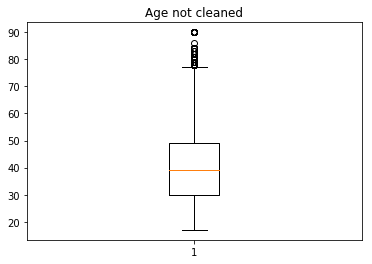

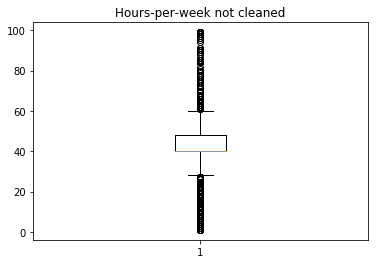

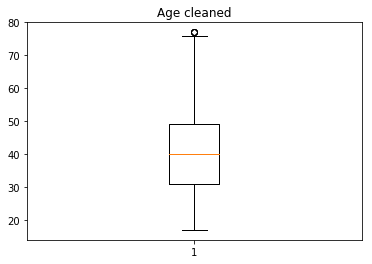

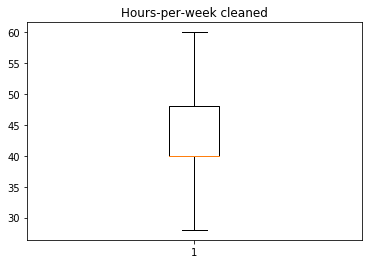

<Figure size 432x288 with 0 Axes>

In [40]:
# your code

import pandas as pd
import matplotlib.pyplot as plt

#read data from csv
df = pd.read_csv('adult.data-3.csv')

#plot age-boxplot
bpAge = plt.boxplot(df['age'])
plt.title("Age not cleaned")
plt.figure()

#plot hours-per-week-boxplot
bpHours = plt.boxplot(df['hours-per-week'])
plt.title("Hours-per-week not cleaned")
plt.figure()

dfClean = df

#clean age
##remove lower outliers
dfClean = dfClean.drop(dfClean[dfClean['age']<bpAge['whiskers'][0].get_ydata()[-1]].index)
##remove upper outliers
dfClean = dfClean.drop(dfClean[dfClean['age']>bpAge['whiskers'][1].get_ydata()[-1]].index)

#clean hours-per-week
##remove lower outliers
dfClean = dfClean.drop(dfClean[dfClean['hours-per-week']<bpHours['whiskers'][0].get_ydata()[-1]].index)
##remove upper outliers
dfClean = dfClean.drop(dfClean[dfClean['hours-per-week']>bpHours['whiskers'][1].get_ydata()[-1]].index)


#for visual comparison boxplots of cleaned data
##plot age-boxplot cleaned
plt.boxplot(dfClean['age'])
plt.title("Age cleaned")
plt.figure()
##plot hours-per-week-boxplot cleaned
plt.boxplot(dfClean['hours-per-week'])
plt.title("Hours-per-week cleaned")
plt.figure()


2. (b) Draw Boxplot of the cleaned data set for "hours-per-week". Is there still any outlier? If so, explain why?

<Figure size 432x288 with 0 Axes>

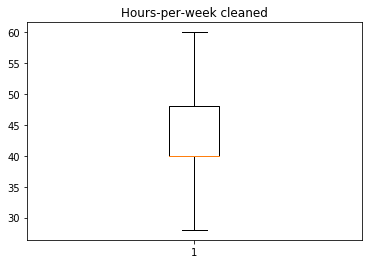

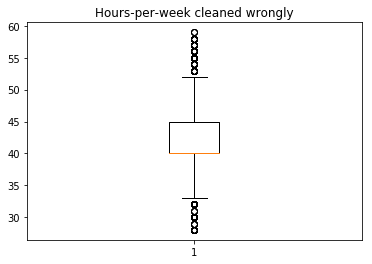

<Figure size 432x288 with 0 Axes>

In [39]:
# your code

#plot hours-per-week-boxplot cleaned
plt.boxplot(dfClean['hours-per-week'])
plt.title("Hours-per-week cleaned")
plt.figure()

### only to demonstrate the outlier fact; see explanation
#remove "lower" outliers
dfWrong = dfClean.drop(dfClean[dfClean['hours-per-week']<=bpHours['whiskers'][0].get_ydata()[-1]].index)
#remove "upper" outliers
dfWrong = dfClean.drop(dfClean[dfClean['hours-per-week']>=bpHours['whiskers'][1].get_ydata()[-1]].index)
plt.boxplot(dfWrong['hours-per-week'])
plt.title("Hours-per-week cleaned wrongly")
plt.figure()

Explanation: No, there are not any outliers. Caused by the fact that a boxplot is a relative measure (the boxplot depends on values like median, IQR, quartiles), it is possible that there are not outliers like in our case. Especially this means that there are not any outliers in the data set (hours-per-week cleaned) beyond the 1.5*IQR mark ((upper and lower whiskers) to become, so called, fliers.

If the data set is modified incorrectly (demonstrated by the set *dfWrong*) which means that the lower and upper whiskers are deleted wrongly, then we can see outliers again. Now, this is caused by different the destribution of the data in *dfWrong* in comparison to the data set *dfClean*.

### Question 3 (Basic visualization):
3. (a) Visualize mean and median of "age", and "hours-per-week" per "sex" by separate plots for the cleaned and the original data sets (there should be 8 plots, 4 plots for the original data set and 4 plots for the cleaned data set). 

Mean   male   age original: 41.12117637807659
Mean   male   age cleaned : 40.9983105104037
Median male   age original: 40.0
Median male   age cleaned : 40.0
Mean   female age original: 37.57591725214676
Mean   female age cleaned : 37.77269372693727
Median female age original: 36.0
Median female age cleaned : 37.0


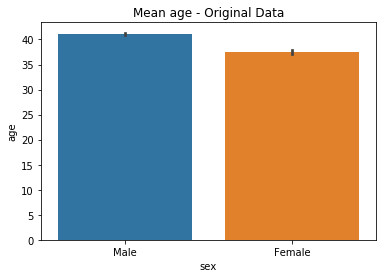

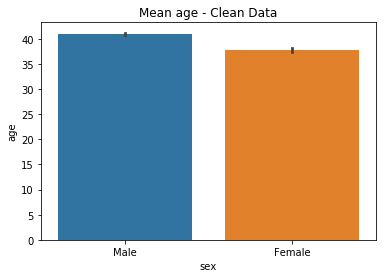

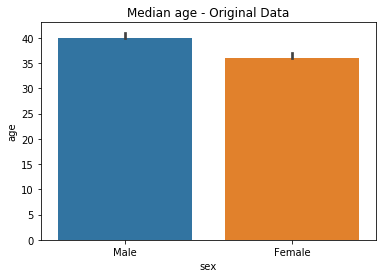

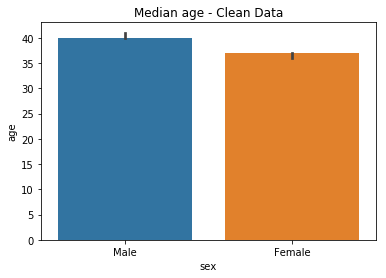

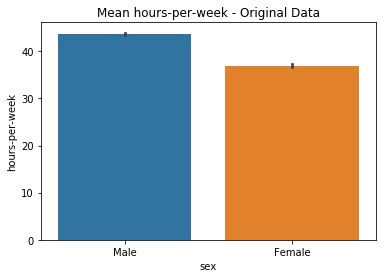

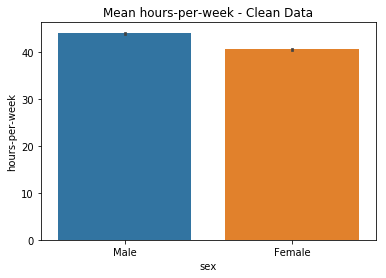

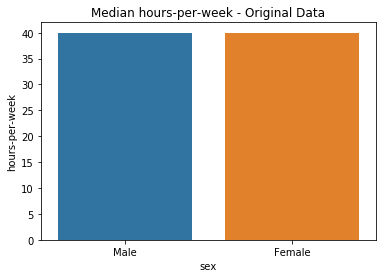

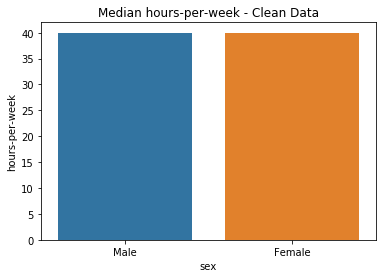

<Figure size 432x288 with 0 Axes>

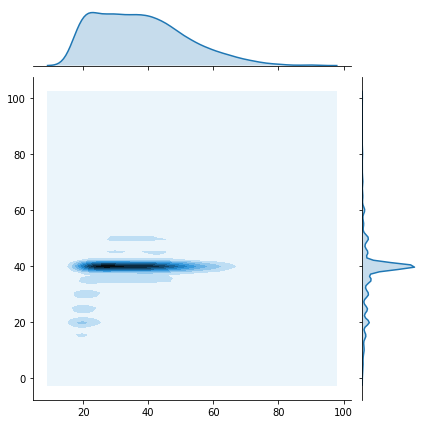

In [31]:
# your code
# Necessary: Please run Q2 before, for obtaining the cleaned data

import seaborn as sns 
import numpy as np

#plot mean-age-original-barplot
sns.barplot(x ='sex', y='age', data=df, estimator=np.mean)
plt.title("Mean age - Original Data")
plt.figure()

#plot mean-age-clean-barplot
sns.barplot(x ='sex', y='age', data=dfClean, estimator=np.mean)
plt.title("Mean age - Clean Data")
plt.figure()

#plot median-age-original-barplot
sns.barplot(x='sex', y='age', data=df, estimator=np.median)
plt.title("Median age - Original Data")
plt.figure()

#plot median-age-clean-barplot
sns.barplot(x='sex', y='age', data=dfClean, estimator=np.median)
plt.title("Median age - Clean Data")
plt.figure()

#plot mean-hours-per-week-original-barplot
sns.barplot(x ='sex', y='hours-per-week', data=df, estimator=np.mean)
plt.title("Mean hours-per-week - Original Data")
plt.figure()

#plot mean-hours-per-week-cleam-barplot
sns.barplot(x ='sex', y='hours-per-week', data=dfClean, estimator=np.mean)
plt.title("Mean hours-per-week - Clean Data")
plt.figure()

#plot median-hours-per-week-original-barplot
sns.barplot(x='sex', y='hours-per-week', data=df, estimator=np.median)
plt.title("Median hours-per-week - Original Data")
plt.figure()

#plot median-hours-per-week-clean-barplot
sns.barplot(x='sex', y='hours-per-week', data=dfClean, estimator=np.median)
plt.title("Median hours-per-week - Clean Data")
plt.figure()

#numerical values for 3b
##drop females in original and clean data
dfM = df.drop(df[df['sex']=='Female'].index)
dfMC = dfClean.drop(dfClean[dfClean['sex']=='Female'].index)
print("Mean   male   age original:", np.mean(dfM['age']))
print("Mean   male   age cleaned :", np.mean(dfMC['age']))
print("Median male   age original:", np.median(dfM['age']))
print("Median male   age cleaned :", np.median(dfMC['age']))
##drop males in original and clean data
dfF = df.drop(df[df['sex']=="Male"].index)
dfFC = dfClean.drop(dfClean[dfClean['sex']=="Male"].index)
print("Mean   female age original:", np.mean(dfF['age']))
print("Mean   female age cleaned :", np.mean(dfFC['age']))
print("Median female age original:", np.median(dfF['age']))
print("Median female age cleaned :", np.median(dfFC['age']))

#visualization of the females orginal data
sns.jointplot(x=['age'], y=['hours-per-week'], data=dfF, kind="kde")

3. (b) Explain how mean and median of "age" per "sex" change when you remove the outliers.

Explanation: With the visualization in bar plots of the mean and median, we can compare proportinally *one* statistical feature splitted per sex. However, for comparing the mean and median now exactly, we have to look at the numerical values, because these can not be detected in the bar plots. Therefore, the values are printed.  
With the numerical values you can see that only the median of the male people does not change, the rest changes. In case of *age* of the *males* the mean is a little bit lower. This means that there are "a lot" of *males* with a higher *age* and/ or with outlyling working *hours-per-week* in the not cleaned data set. By cleaning these, outlying values are deleted, so that the mean shrinks. The median has the same value, 40 years. In fact this means that there are before and after cleaning still 50% of *males* in the data set over and under 40 years old.  
In contrast the mean and median of *age* of the *females* increased. This fact is caused by cleaning the data set by *age*, but in addation by *hours-per-week* too. In the age-boxplot from question 2 we can identify that there are only outliers in the feature of *age* above the upper whisker. Intuitivly, the mean and median should be decrease, because we drop only values above the mean and median. But due to the fact of cleaning the feature *hours-per-week* too, there is the possibility of increasing the mean and median. In fact these increased values means that there are "a lot" of young *females* working less than the lower whisker values of this feature. Maybe this is caused by the higher family wish (pregnancy) in this range of age. (e.g. visualizable wih jointplot - positive/ right skewed distribution at *age* seeable, and raised number of young females working about 20h per week)

### Question 4 (Distribution):
4. (a) Explore into distribution of "age" in the original data set. Does it have any well-known distribution (normal, uniform, skewed, ...)? If so, what are the main statistical features (mean, median, and mode) of this specific type of distribution.

Mean   age original data: 40.10296508043271
Median age original data: 39.0
Mode   age original data: ModeResult(mode=array([37]), count=array([532]))


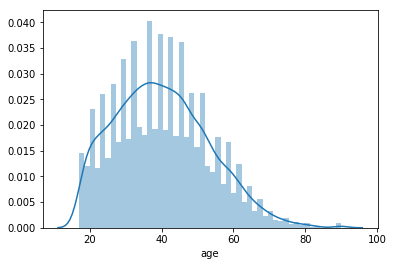

In [38]:
# your code
# no code from above for execution needed --- new section

import pandas as pd
import seaborn as sns 
import numpy as np
from scipy import stats

#read data from csv
df = pd.read_csv('adult.data-3.csv')

sns.distplot(df['age'])

print("Mean   age original data:", np.mean(df['age']))
print("Median age original data:", np.median(df['age']))
print("Mode   age original data:", stats.mode(df['age']))

Explanation: The distribution is a well-known positive/ right skewed distribution. This can be seen visual in the displot and, as in the most cases of right skewed distributions, in the relation of mean, median and mode. These three values occur in the sequence of mode<median<mean in right skewed distribution. Also the fact of median&#8800;mean indicates that it can not be a normal distribution.

4. (b) Explore into distribution of "age" and "hours-per-week" together. Explain how the data is distributed with respect to these two attributes in the original data sets (using Jointplot)?


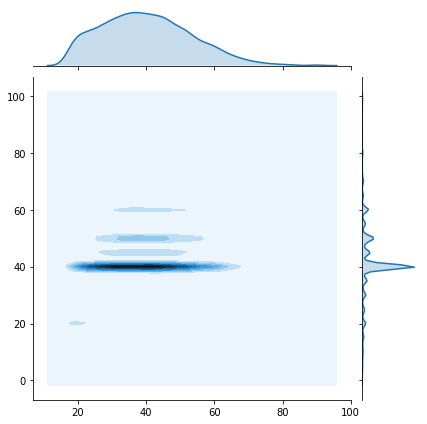

In [18]:
# your code

sns.jointplot(x=['age'], y=['hours-per-week'], data=df, kind="kde")

Explanation: We can see that most of the working people (20-65 years) work 40 hours-per-week (darkblue). A few of the ~20 years old people work only 20 hours-per-week (light blue). Maybe like 'HiWis' during their studies. In addition we can see that there is an higher amount of middle aged people (~40years) which are working more than 40 hours per week, maybe higher job positions which are characterized by this group of age.

## Building models to perform predictions

### Question 5 (Decision Tree):
5. (a) Consider all the categorical attributes except label as descriptive features and label (income) as target feature. Make two decision trees (one based on Entropy and another based on Gini).

In [50]:
# your code
# no code from above for execution needed --- new section

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from subprocess import check_output
import seaborn as sns 
import numpy as np
from DecisionTree import DecisionTree

#read data from csv
df = pd.read_csv('adult.data-3.csv')

categorical_features = df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','label']]
columns = categorical_features.columns

#all columns except the last one are descriptive by default
descriptive_features = columns[:-1]
#last column is considered as label
label = columns[-1]

#converting all columns to string 
for column in columns:
    categorical_features[column] = categorical_features[column].astype(str)
   
data_descriptive = categorical_features[descriptive_features].values
data_label = categorical_features[label].values

decisionTreeE = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
decisionTreeE.id3(0,0)
#decisionTreeE.print_visualTree()

decisionTreeG = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "gini")
decisionTreeG.id3(0,0)
#decisionTreeG.print_visualTree()

#print("Entropy: ", format(decisionTreeE.entropy))
#print("Gini   : ", format(decisionTreeG.gini))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


5. (b) What are the best attributes (based on Gini and Entropy) for splitting the trees in the third round of ID3?   

Explanation: In both cases (entropy and gini) the best attribute for splitting the trees in the third round of ID3 is *occupation*. Beginning from the root, the first one is *relationship*, second one education and the third one *occupation*. Furthermore, both decision trees, based on entropy and gini, are the same.

5. (c) Prune the tree which is made based on Entropy by 7000 as minimum number of samples. Identify which value of the first node/attribute is chosen to be split in the second round of ID3 and explain why?

In [46]:
# your code

decisionTreeE.id3(0,7000)
#decisionTreeE.print_visualTree()

Explanation: The chosen first node/ attribute for splitting in the secound round of ID3 has got the value *Husband*. This node is chosen because its entropy is the lowest, respectivly its information gain is the highest in this step of choosing in the alogrithm. Due to the fact that this subtree is the same as in the not pruned tree, the criteria of 7000 minimum samples is fulfilled in particular.

### Question 6 (Regression):

6. (a) Create two sets of independent variables (1) and (2)

In [47]:
# your code
# no code from above for execution needed --- new section

import pandas as pd

#read data from csv
df = pd.read_csv('adult.data-3.csv')

#split original data into independent variables
dataset1 = df[['age','marital-status','sex']]
dataset2 = df[['workclass','education','hours-per-week']]

6. (b) Which attributes are suitable as an input for the logistic regression and which need to be modified first? Why? 

Explanation: 

Suitable as an input for the logistic regression are all continuous descriptive features. These are in our case: age, education-num, hours-per-week. And a binary categorical target feature, here label.  
All remaning attributes (workclass, education, marital-status, occupation, relationship, race, sex, native-country)
are categorical descriptive features. Therefore those have to be encoded, e.g. with one-hot-encoding, to become continuous descriptives features, in other words to become a valid input for the logistic resgression.

In [48]:
# your modification

#original data
dataset = df[['age','workclass','education-num','marital-status','occupation','relationship','race','sex','hours-per-week','native-country']]
dataset = pd.get_dummies(dataset, columns = ['workclass','marital-status','occupation','relationship','race','sex','native-country'])
##esthetic - move target feature to last position [-1] 
label = df['label']
dataset = pd.concat([dataset,label], axis=1)

#dataset1 - encode columns
dataset1 = pd.get_dummies(dataset1, columns=['marital-status','sex'])

#dataset2 - encode columns
dataset2 = pd.get_dummies(dataset2, columns=['workclass','education'])

6. (c) Train three logistic regression classifiers based on the two created data sets as well as the initial data set:

In [49]:
# your code

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

X = dataset.iloc[:,0:-1] #select all feature columns excluding label
y_training_6c = y = pd.get_dummies(dataset['label'], drop_first=True) #drop_first to get one binary column representing of the two states in numbers

#classifier for original dataset
classifierLogistic = LogisticRegression()
classifierLogistic.fit(X, y)
y_predTraining_6c = y_pred = classifierLogistic.predict(X)

#classifier for dataset1
X = dataset1
classifierLogistic1 = LogisticRegression()
classifierLogistic1.fit(X, y)
y_pred1 = classifierLogistic1.predict(X)

#classifier for dataset2
X = dataset2
classifierLogistic2 = LogisticRegression()
classifierLogistic2.fit(X, y)
y_pred2 = classifierLogistic2.predict(X)

#print the mean squared errors of each classifier
print('Mean squared error original data: ', mean_squared_error(y, y_pred))
print('Mean squared error      dataset1: ', mean_squared_error(y, y_pred1))
print('Mean squared error      dataset2: ', mean_squared_error(y, y_pred2))

#print the first 10 predicitons of each classifier
"""print(y_pred[0:10])
print(y_pred[0:10])
print(y_pred[0:10])"""

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error original data:  0.19180539207443528
Mean squared error      dataset1:  0.2503222913513817
Mean squared error      dataset2:  0.2978532593464492


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'print(y_pred[0:10])\nprint(y_pred[0:10])\nprint(y_pred[0:10])'

6. (d) Interpret the three resulting models and compare them. Which model do you recommend and why?

Explanation: 

Interpreting the mean squared error as loss function would mean that the classifier on the original dataset is the best, because it has the lowest error. Nevertheless, this evaluation is based on the training data and **not** on test data (simplified evaluation process as described in the lecture). In other words this "good" model could be overfitted and perform not good on the test data as on the training data.

### Question 7 (Neural Networks)

7. (a) What are the inputs of your network?

Explanation: The inputs for the classification problem with a neural network are the 10 attributes (desriptive features) from the dataset (excluded *education* and the target *label*). It is not necessary to use all the 11 attributes (excluded target *label*), because *education* and *education-num* are redundant (compare question 1). They describe the same feature only in two syntactic ways. This means that in our case we can use only on of this attributes, in other words we use *education-num* for the Neural Network. Due to the fact that the input are numeric values, we have to encode the categorical attributes.

7. (b) What are the possible number of input pattern for your network (just including categorical attributes)?

Explanation: As input pattern all combinations of the 8 categorical attributes (*workclass, education-num, marital-status, occupation, relationship, race, sex, native-country*) are suitable.  
This means that our Neural Network has got 10 inputs in the input layer in which each neuron represents one of 10 attributes (excluded *education* and the target *label*).

7. (c.i) First, with default parameters and return the parameters.

In [2]:
# your code
# no code from above for execution needed --- new section

import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric

#read data from csv
df_training = pd.read_csv('adult.data-3.csv')
df_test = pd.read_csv('adult.test-3.csv')

X_training = df_training[['age','workclass','education-num','marital-status','occupation','relationship','race','sex','hours-per-week','native-country']]
X_training = pd.get_dummies(X_training, columns = ['workclass','marital-status','occupation','relationship','race','sex','native-country'])
y_training = df_training['label']

X_test = df_test[['age','workclass','education-num','marital-status','occupation','relationship','race','sex','hours-per-week','native-country']]
X_test = pd.get_dummies(X_test, columns = ['workclass','marital-status','occupation','relationship','race','sex','native-country'])
y_test = df_test['label']

#function for MLPClassifier with sklearn default values
def mlp(layerTupel=(100), activationFunction='relu', params=False, save=False):
    mlp = MLPClassifier(hidden_layer_sizes=layerTupel, activation=activationFunction)
    mlp.fit(X_training, y_training)#training

    y_predTraining = mlp.predict(X_training)  
    y_predTest = mlp.predict(X_test)   

    accuracyTraining = metric.accuracy_score(np.array(y_training).flatten(), np.array(y_predTraining).flatten(), normalize=True)
    accuracyTest = metric.accuracy_score(np.array(y_test).flatten(), np.array(y_predTest).flatten(), normalize=True)
    print('Shape: ', [coef.shape for coef in mlp.coefs_]) 
    print('Accuracy training =', accuracyTraining)                         
    print('Accuracy test     =', accuracyTest,'\n')
   
    if(params):
        print('Parameters: ', mlp.get_params())
    if(save):
        global y_predTraining_7c, y_training_7c, y_predTest_7c, y_test_7c
        y_predTraining_7c = y_predTraining
        y_training_7c = y_training
        y_predTest_7c = y_predTest
        y_test_7c = y_test

mlp(params=True)

FileNotFoundError: [Errno 2] File b'adult.data-3.csv' does not exist: b'adult.data-3.csv'

7. (c.ii) Second, try to find the optimized number of hidden layers and nodes. (Start with default number and then at least go with one number above and one number below the default) 


In [73]:
# your code for lower number of hidden layers
mlp(())

# your code for higher number of hidden layers
mlp((100,100))
mlp((100,100,100))  

# your code for testing number of neurons in each layer
mlp((80))
mlp((88),save=True)
mlp((90))
mlp((99))
mlp((110))
mlp((120))
mlp((130))
mlp((80,90)) 
mlp((110,120)) 

Shape:  [(88, 1)]
Accuracy training = 0.8068493918502326
Accuracy test     = 0.806707204717155 



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Shape:  [(88, 100), (100, 100), (100, 1)]
Accuracy training = 0.8548848158735497
Accuracy test     = 0.796265585651987 



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Shape:  [(88, 100), (100, 100), (100, 100), (100, 1)]
Accuracy training = 0.8685051286362871
Accuracy test     = 0.763589460106873 

Shape:  [(88, 80), (80, 1)]
Accuracy training = 0.8183958298301665
Accuracy test     = 0.8212026288311529 

Shape:  [(88, 88), (88, 1)]
Accuracy training = 0.8234964407824673
Accuracy test     = 0.8119280142497389 

Shape:  [(88, 90), (90, 1)]
Accuracy training = 0.8233843394428564
Accuracy test     = 0.8018549229162828 

Shape:  [(88, 99), (99, 1)]
Accuracy training = 0.83156773723446
Accuracy test     = 0.8004422332780542 

Shape:  [(88, 110), (110, 1)]
Accuracy training = 0.8230480354240233
Accuracy test     = 0.8152447638351452 

Shape:  [(88, 120), (120, 1)]
Accuracy training = 0.825794518244493
Accuracy test     = 0.7865610220502426 



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Shape:  [(88, 130), (130, 1)]
Accuracy training = 0.832352446611737
Accuracy test     = 0.8134635464652048 



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Shape:  [(88, 80), (80, 90), (90, 1)]
Accuracy training = 0.852698839751135
Accuracy test     = 0.7906148270990725 



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Shape:  [(88, 110), (110, 120), (120, 1)]
Accuracy training = 0.8575191973544084
Accuracy test     = 0.7706529082980161 



7. (c.iii) Third, try to train your model with one linear activation function and one non linear activation function, name the functions and explain if there is any difference in your networks and why? (you can use evaluation metrics to show which activation function works better for this data set)


In [56]:
# your code for linear activation function
mlp(activationFunction='identity')
mlp((100,100), 'identity')
mlp((88), 'identity')
mlp((88,88,88), 'identity')

# your code for non linear activation function
mlp(activationFunction='logistic')
mlp((100,100), 'logistic')
mlp((88), 'logistic')

# your code for comparing two networks 
#evaluation metrics are printed in the mlp-function for easier handling


Shape:  [(88, 100), (100, 1)]
Accuracy training = 0.806569138501205
Accuracy test     = 0.8070757324488668 

Shape:  [(88, 100), (100, 100), (100, 1)]
Accuracy training = 0.7896418362199429
Accuracy test     = 0.7430133284196302 

Shape:  [(88, 88), (88, 1)]
Accuracy training = 0.806569138501205
Accuracy test     = 0.7943615257048093 

Shape:  [(88, 88), (88, 88), (88, 88), (88, 1)]
Accuracy training = 0.806569138501205
Accuracy test     = 0.7938087341072416 



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Shape:  [(88, 100), (100, 1)]
Accuracy training = 0.8263550249425481
Accuracy test     = 0.8056630428106382 

Shape:  [(88, 100), (100, 100), (100, 1)]
Accuracy training = 0.8202455019337481
Accuracy test     = 0.8073214176033413 

Shape:  [(88, 88), (88, 1)]
Accuracy training = 0.82545821422566
Accuracy test     = 0.8056630428106382 



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Parameters: *activationFunction*:
- 'identity' - linear
- 'logistic' - non-linear

Explanation: In general, we can see that a non-linear activation function performs better in the metrics of accuracy. This is caused by the introduced non-linearity to the network, so that not only linear, moreover non-linear mappings from input to output can be generated. This means that we are not only limited to linearity.

7. (c.iv) Which model do you recommend to be used as your classifier and why? (with respect to the number of hidden layer and activation function (linear or nonlinear))

Explanation: With respect to the accuray on the training data, I would recommend a neural network with a "higher" number of hidden layers and neurons in each layer. Additionally, a non-linear activation function to break down possible linearity in the network.  
But, due to this recommendation, the probability of getting a overfitted model (difference of accuracy on training and test data) increases because the model is too precise - learns "too much". This leads to another approach of evaluation the models, e.g. with cross-validation, to counter to that overfitting behaviour.

## Analysing the quality of the prediction models

### Question 8 (Evaluation metrics)

8. (a) Calculate the following metrics for the model 7. (c, i) and the logistic regression with all the initial attributes in question 6 (c):

- Confusion matrices on the training data

In [74]:
# your code for the confusion matrices on the training data
# Necessary: Please run Q2 and Q6 before

from sklearn.metrics import confusion_matrix

cm_training_7c = confusion_matrix(np.array(y_training_7c), np.array(y_predTraining_7c))
tn, fp, fn, tp = cm_training_7c.ravel()
print('Confusion matrix training data 7c: ')
print(cm_training_7c)
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp, '\n')

cm_training_6c = confusion_matrix(np.array(y_training_6c), np.array(y_predTraining_6c))
tn, fp, fn, tp = cm_training_6c.ravel()
print('Confusion matrix training data 6c: ')
print(cm_training_6c)
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp, '\n')

Confusion matrix training data 7c: 
[[8329 1671]
 [1478 6363]]
TN: 8329
FP: 1671
FN: 1478
TP: 6363 

Confusion matrix training data 6c: 
[[8134 1866]
 [1556 6285]]
TN: 8134
FP: 1866
FN: 1556
TP: 6285 



- Confusion matrices on the test data

In [75]:
# your code for the confusion matrices on the test data
import pandas as pd

cm_test_7c = confusion_matrix(np.array(y_test_7c), np.array(y_predTest_7c))
tn, fp, fn, tp = cm_test_7c.ravel()
print('Confusion matrix test data 7c: ')
print(cm_test_7c)
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp, '\n')

y_predTest_6c = classifierLogistic.predict(X_test)
y_test_6c = pd.get_dummies(y_test, drop_first=True)
cm_test_6c = confusion_matrix(np.array(y_test_6c), np.array(y_predTest_6c))
tn, fp, fn, tp = cm_test_6c.ravel()
print('Confusion matrix test data 6c: ')
print(cm_test_6c)
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp, '\n')

Confusion matrix test data 7c: 
[[10209  2226]
 [  836  3010]]
TN: 10209
FP: 2226
FN: 836
TP: 3010 

Confusion matrix test data 6c: 
[[10064  2371]
 [  796  3050]]
TN: 10064
FP: 2371
FN: 796
TP: 3050 



- Precision, recall and F1-scores on the test data

In [76]:
# your code for precision, recall and F1-scores on the test data
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Precision test data 7c: ', precision_score(y_test_7c, y_predTest_7c, average=None))
print('Recall    test data 7c: ', recall_score(y_test_7c, y_predTest_7c, average=None))
print('F1-scores test data 7c: ', f1_score(y_test_7c, y_predTest_7c, average=None), '\n')

print('Precision test data 6c: ', precision_score(y_test_6c, y_predTest_6c, average=None))
print('Recall    test data 6c: ', recall_score(y_test_6c, y_predTest_6c, average=None))
print('F1-scores test data 6c: ', f1_score(y_test_6c, y_predTest_6c, average=None))

Precision test data 7c:  [0.92430964 0.57486631]
Recall    test data 7c:  [0.82098914 0.78263131]
F1-scores test data 7c:  [0.86959114 0.66284959] 

Precision test data 6c:  [0.9267035  0.56262682]
Recall    test data 6c:  [0.80932851 0.79303172]
F1-scores test data 6c:  [0.86404808 0.6582497 ]


- Accuracy scores on training and test data

In [77]:
# your code for accuracy scores on training and test data

from sklearn.metrics import accuracy_score

print('Accuracy training data 7c: ', accuracy_score(y_training_7c, y_predTraining_7c))
print('Accuracy test     data 7c: ', accuracy_score(y_test_7c, y_predTest_7c), '\n')

print('Accuracy training data 6c: ', accuracy_score(y_training_6c, y_predTraining_6c))
print('Accuracy test     data 6c: ', accuracy_score(y_test_6c, y_predTest_6c))

Accuracy training data 7c:  0.8234964407824673
Accuracy test     data 7c:  0.8119280142497389 

Accuracy training data 6c:  0.8081946079255647
Accuracy test     data 6c:  0.8054787789447823


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 7.

8. (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:
With help of the confusion matrix, we can detect an unequal distribution of the training data (imbalanced data) which indicates the usage of the F1-score, and not the precision score. In contrast, if False Negatives (FN) are associated with high costs, recall should be used. 
So, due to the fact that non of our labels "*<50K*" and "*>50K*" is rated to positive by default, the scores indicate both classes in a list. This means that there is no "best" model and it depends on the requirements which one is the most suitable. In our case the False Negatives (FN) should not be associated with high costs. Thus, we can compare the F1-score. Besides, we can say in general that the trained logistic regression model is always the same on the same training data. Moreover, in case of neural network it is not. This means that e.g. it is complicated to save the best model for comparing it in this question because we can not predict the "best" model and the values are changing all the time. Also the risk of overfitting (difference of accuracy on training and test data) is much higher at neural network compared to our regression model.
Although all performance metrics distinguish in a very small amount, in my opinion I would use neural networks because in comparison the accuracy and the recall (if needed) is better. In addition, we know from the lecture that the quality of prediction of deep neural network is better than logistic regression (in case of a not-small data set, like in our case).

8. (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:
In our case the neural network model suffers more from overfitting (compare question 8b). But it seems, that in general both models does not suffer too much from overfitting, although there are higher outliers at neural network (compare resultion accuracies question 7).

No model suffers from underfitting because non of them performs bad (compare accuracies) on training and test data (accuracy significant worse/ under the assumption that performing "bad" means less than 50% accuracy).

8. (d) In the hypothesis that a separate validation set is not available, how would you proceed in evaluating a model? Refer to the evaluation techniques seen in the lectures.

Explanation: Since cross-validation is not possible due to the missing validation set, I would separate the data set to use 80% for training and 20% for testing, and perform the "simple" testing of the trained model.